## **Image Classification**

In [ ]:
# Import beberapa library yang dibutuhkan

import os
import random
import numpy as np
import pandas as pd

import tensorflow as tf
print(tf.__version__)

from tensorflow import keras

import matplotlib.pyplot as plt
%matplotlib inline

2.14.0


In [ ]:
# Menghubungkan ke google drive

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Melakukan ekstraksi pada file zip yang ada di google drive

import zipfile,os

local_zip = '/content/gdrive/My Drive/Colab Notebooks/PRS/sample_data/paper_rock_scissors_dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/gdrive/My Drive/Colab Notebooks/PRS/sample_data')
zip_ref.close()

In [ ]:
# Mengakses lokasi dari dataset

base_dir = '/content/gdrive/My Drive/Colab Notebooks/PRS'
train_dir = os.path.join(base_dir, 'sample_data/paper_rock_scissors_dataset')
os.listdir(train_dir)

['paper', 'rock', 'scissors']

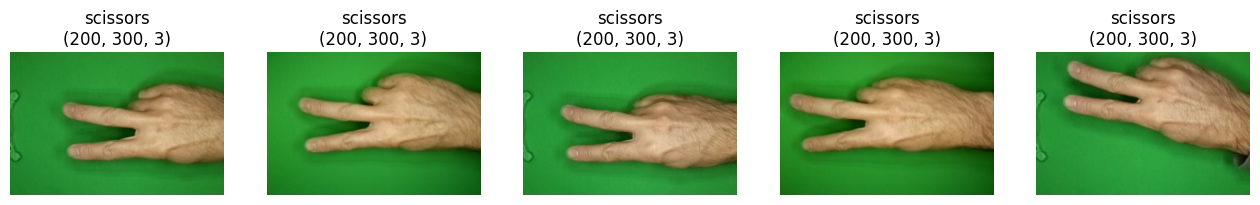

In [ ]:
# Menampilkan 5 sample gambar dari dataset

def plot_random_image(target_dir):
    target_class=random.choice(os.listdir(target_dir))
    target_folder=os.path.join(target_dir,target_class)
    random_image=random.sample(os.listdir(target_folder),5)

    plt.figure(figsize=(16,5))
    for i in range(5):

        plt.subplot(1,5,i+1)
        img=tf.io.read_file(os.path.join(target_folder,random_image[i]))
        img=tf.io.decode_image(img)
        plt.imshow(img)
        plt.title(f'{target_class}\n{img.shape}')
        plt.axis(False)

plot_random_image(train_dir)

In [ ]:
# Melakukan split data dan menerapkan Image Augmentation

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator( rescale = 1.0/255,
                                    horizontal_flip=True,
                                    vertical_flip=True,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    fill_mode='constant',
                                    validation_split=0.2
)

validation_datagen = ImageDataGenerator( rescale = 1.0/225,
                                       validation_split=0.2
)

train_generator = train_datagen.flow_from_directory( train_dir,
                                                        target_size = (150,100),
                                                        shuffle=True,
                                                        subset='training')

validation_generator = validation_datagen.flow_from_directory( train_dir,
                                                                target_size = (150,100),
                                                                shuffle=False,
                                                                subset='validation')

Found 1751 images belonging to 3 classes.
Found 437 images belonging to 3 classes.


In [ ]:
# Membuat model training dengan CNN architecture

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 100, 3)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
# Menerapkan monitoring pada model menggunakan EarlyStopping dan menggunakan optimizer dengan RMSprop
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

model.compile(loss='categorical_crossentropy',
              optimizer="rmsprop",
              metrics=['accuracy'])

# Melakukan training pada model dengan maksimal epoch 50, dan callback dengan toleransi pada val_loss 3 epoch
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=50,
    callbacks=callback,
    verbose=1
)

Epoch 1/50
55/55 [==============================] - 53s 943ms/step - loss: 1.0019 - accuracy: 0.5014 - val_loss: 0.5884 - val_accuracy: 0.8192
Epoch 2/50
55/55 [==============================] - 44s 799ms/step - loss: 0.5310 - accuracy: 0.7898 - val_loss: 0.2617 - val_accuracy: 0.9108
Epoch 3/50
55/55 [==============================] - 48s 880ms/step - loss: 0.3032 - accuracy: 0.8846 - val_loss: 0.2729 - val_accuracy: 0.8970
Epoch 4/50
55/55 [==============================] - 44s 808ms/step - loss: 0.2240 - accuracy: 0.9275 - val_loss: 0.1896 - val_accuracy: 0.9359
Epoch 5/50
55/55 [==============================] - 45s 815ms/step - loss: 0.2023 - accuracy: 0.9258 - val_loss: 0.0904 - val_accuracy: 0.9657
Epoch 6/50
55/55 [==============================] - 42s 758ms/step - loss: 0.1753 - accuracy: 0.9429 - val_loss: 0.1981 - val_accuracy: 0.9245
Epoch 7/50
55/55 [==============================] - 42s 771ms/step - loss: 0.1496 - accuracy: 0.9526 - val_loss: 0.0657 - val_accuracy: 0.9771

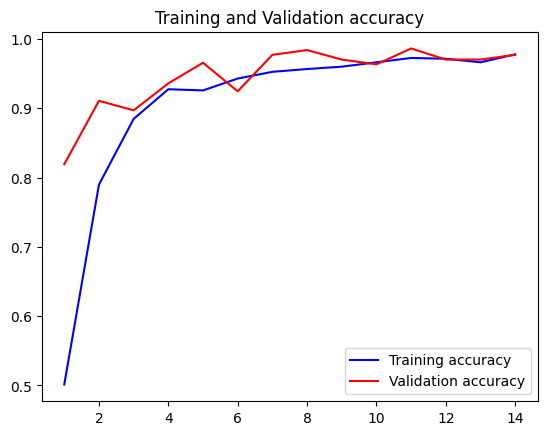

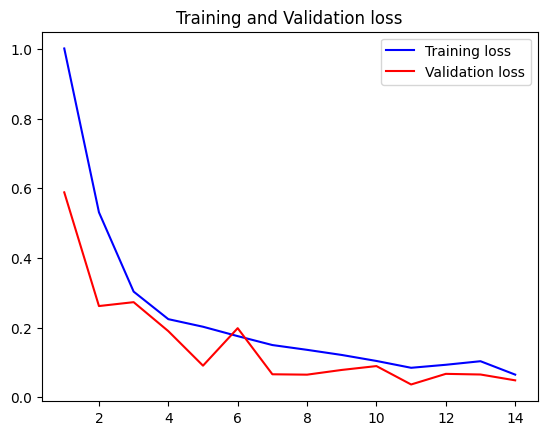

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epoch = range(1, len(accuracy) + 1)

# Membuat grafik pada Train and Validation accuracy
plt.plot(epoch, accuracy, 'b', label='Training accuracy')
plt.plot(epoch, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()

# Membuat grafik pada Train and Validation loss
plt.plot(epoch, loss, 'b', label='Training loss')
plt.plot(epoch,val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

# Hasil:
# Akurasi Training = 97,7%
# Akurasi Validation = 97,7%

# Kesimpulan: selain akurasi yang didapat cukup tinggi, model tidak mengalami overfitting

---

Overfitting terjadi ketika model memiliki prediksi yang terlalu baik pada data training, namun prediksinya buruk pada data validasi. Ketika sebuah model overfitting, model tidak dapat melakukan generalisasi dengan baik. Sehingga mengakibatkan banyak kesalahan dalam memprediksi data-data baru yang ditemui pada tahap produksi.

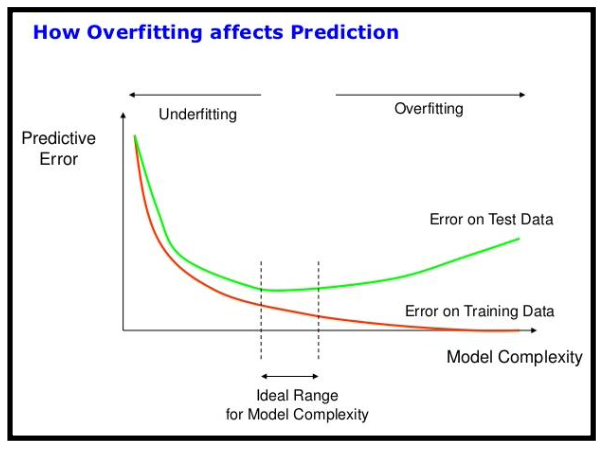

In [ ]:
# Menyimpan model yang sudah di latih

#model.save('/content/gdrive/My Drive/Colab Notebooks/PRS/models/model_prs_acc_97.h5') #save models

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Saving WhatsApp Image 2023-12-11 at 9.12.22 PM.jpeg to WhatsApp Image 2023-12-11 at 9.12.22 PM.jpeg
1/1 [==============================] - 0s 99ms/step
[[0. 1. 0.]]
suit Batu


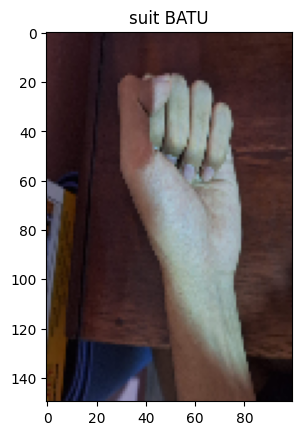

In [ ]:
# Melakukan testing pada model yang telah disimpan

import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

modelTest = keras.models.load_model('/content/gdrive/My Drive/Colab Notebooks/PRS/models/model_prs_acc_97.h5')

uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  test_img = image.load_img(path, target_size=(150,100))
  imgplot = plt.imshow(test_img)
  x = image.img_to_array(test_img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  result = modelTest.predict(images)
  print(result)

  if result[0][0] == 1:
    print('suit Kertas')
    plt.title(f'suit KERTAS')
  elif result[0][1] == 1:
    print('suit Batu')
    plt.title(f'suit BATU')
  elif result[0][2] == 1:
    print('suit Gunting')
    plt.title(f'suit GUNTING')
  else:
    print('unknown')